<a href="https://colab.research.google.com/github/Yuliana1453/Proyek-Sistem-Rekomendasi/blob/main/Proyek_Rekomendasi_Buku_(Collaborative_Filtering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Modul

In [2]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

#Loading Data

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yuliana1453","key":"922ded906b70e997e0d6db25055c4c48"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Download dataset rekomendasi buku
!kaggle datasets download -d arashnic/book-recommendation-dataset

Dataset URL: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset
License(s): CC0-1.0
  0% 0.00/24.3M [00:00<?, ?B/s]
100% 24.3M/24.3M [00:00<00:00, 609MB/s]


In [5]:
# Ekstrak Dataset
!unzip book-recommendation-dataset.zip

Archive:  book-recommendation-dataset.zip
  inflating: Books.csv               
  inflating: DeepRec.png             
  inflating: Ratings.csv             
  inflating: Users.csv               
  inflating: classicRec.png          
  inflating: recsys_taxonomy2.png    


In [6]:
# Load data
books = pd.read_csv('/content/Books.csv')
users = pd.read_csv('/content/Users.csv')
ratings = pd.read_csv('/content/Ratings.csv')

# Tampilkan jumlah data unik
print('Jumlah data buku      :', books['ISBN'].nunique())
print('Jumlah data pengguna  :', users['User-ID'].nunique())
print('Jumlah data ratings   :', ratings.shape[0])

<ipython-input-6-3373230196>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/Books.csv')


Jumlah data buku      : 271360
Jumlah data pengguna  : 278858
Jumlah data ratings   : 1149780


# Exploratory Data Analysis (EDA)

##Books.csv

In [7]:
print('Books:')
print(books.info(), '\n')

Books:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None 



In [8]:
print('Contoh data buku:')
display(books.head())

Contoh data buku:


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
print("Jumlah judul unik:", books['Book-Title'].nunique())
print("Jumlah penulis unik:", books['Book-Author'].nunique())
print("Jumlah penerbit unik:", books['Publisher'].nunique())
print("Jumlah tahun terbit unik:", books['Year-Of-Publication'].nunique())
books['Publisher'].unique()[:10]  # Menampilkan 10 nilai pertama

Jumlah judul unik: 242135
Jumlah penulis unik: 102022
Jumlah penerbit unik: 16807
Jumlah tahun terbit unik: 202


array(['Oxford University Press', 'HarperFlamingo Canada',
       'HarperPerennial', 'Farrar Straus Giroux',
       'W. W. Norton &amp; Company', 'Putnam Pub Group',
       'Berkley Publishing Group', 'Audioworks', 'Random House',
       'Scribner'], dtype=object)

## Users.csv

In [10]:
print('Users:')
print(users.info(), '\n')

Users:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB
None 



In [11]:
print('Contoh data pengguna:')
display(users.head())

Contoh data pengguna:


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [12]:
print("Jumlah user unik:", users['User-ID'].nunique())
print("Jumlah lokasi unik:", users['Location'].nunique())
print("Jumlah usia unik:", users['Age'].nunique())

Jumlah user unik: 278858
Jumlah lokasi unik: 57339
Jumlah usia unik: 165


Usia minimum: 0.0
Usia maksimum: 244.0


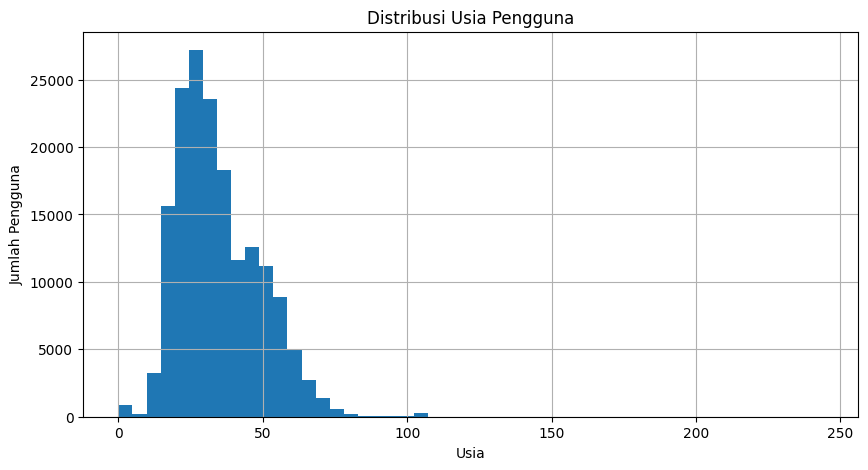

In [13]:
# Cek nilai usia yang tidak wajar
print("Usia minimum:", users['Age'].min())
print("Usia maksimum:", users['Age'].max())

## Cek distribusi usia
users['Age'].describe()

## Visualisasi distribusi usia
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
users['Age'].hist(bins=50)
plt.title('Distribusi Usia Pengguna')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pengguna')
plt.show()

**📌 Distribusi Usia Pengguna**
- Usia minimum: 0 tahun
- Usia maksimum: 244 tahun

Terlihat bahwa:
- Sebagian besar pengguna berada pada rentang 20-40 tahun.
- Terdapat outlier di usia ekstrem (misalnya 0 atau >100) yang sebaiknya difilter.

In [14]:
users['Country'] = users['Location'].apply(lambda x: x.split(',')[-1].strip())
top_countries = users['Country'].value_counts().head(10)
print(top_countries)

Country
usa               139711
canada             21658
united kingdom     18538
germany            17043
spain              13147
australia          11784
italy              11266
                    4578
france              3455
portugal            3325
Name: count, dtype: int64


**🌍Top 10 negara asal pengguna:**
1. USA             → 139.711 pengguna
2. Canada          →  21.658
3. United Kingdom  →  18.538
4. Germany         →  17.043
5. Spain           →  13.147
6. Australia       →  11.784
7. Italy           →  11.266
9. Unknown         →   4.575
8. France          →   3.455
9. Portugal        →   3.325

Terdapat 4.575 pengguna yang tidak memiliki informasi negara (entah kosong atau data error).

##Ratings.csv

In [15]:
print('Ratings:')
print(ratings.info())

Ratings:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB
None


In [16]:
print('Contoh data rating:')
display(ratings.head())

Contoh data rating:


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [17]:
# Cek jumlah nilai unik
print("Jumlah rating unik      :", ratings['Book-Rating'].nunique())
print("Nilai rating minimum    :", ratings['Book-Rating'].min())
print("Nilai rating maksimum   :", ratings['Book-Rating'].max())
print("Jumlah user unik        :", ratings['User-ID'].nunique())
print("Jumlah buku yang dirating:", ratings['ISBN'].nunique())

Jumlah rating unik      : 11
Nilai rating minimum    : 0
Nilai rating maksimum   : 10
Jumlah user unik        : 105283
Jumlah buku yang dirating: 340556


<ipython-input-18-2367100478>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Book-Rating', data=ratings, palette='viridis')


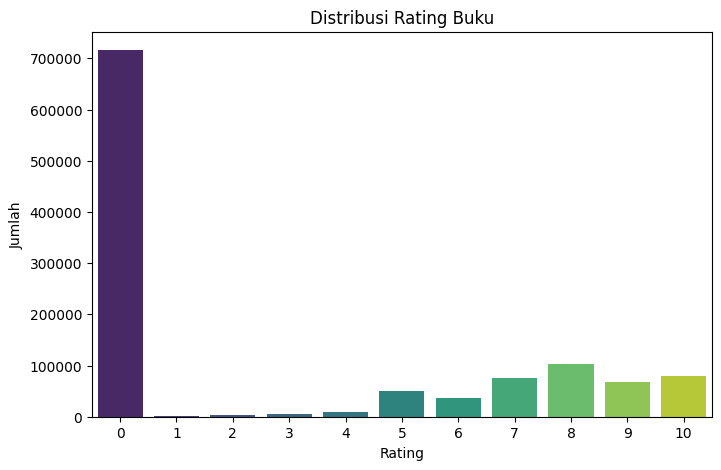

In [18]:
# Visualisasi Distribusi Rating
plt.figure(figsize=(8,5))
sns.countplot(x='Book-Rating', data=ratings, palette='viridis')
plt.title('Distribusi Rating Buku')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

**Distribusi rating sangat tidak seimbang:**

- Rating 0 mendominasi total data (lebih dari 700.000 entri!)
- Rating dengan nilai tinggi (8-10) jauh lebih sedikit.

Hal ini menunjukkan bahwa sebagian besar pengguna tidak memberikan rating eksplisit.

#Data Preprocessing

##1. Filter rating

Karena rating 0 artinya pengguna tidak benar-benar menilai buku, kita hanya gunakan rating > 0.

In [20]:
ratings = ratings[ratings['Book-Rating'] > 0]

##2. Filter User & Buku yang Aktif

Untuk menghindari data yang terlalu sparse (jarang), kita hanya ambil:
- User yang memberi minimal 5 rating
- Buku yang dirating minimal 5 kali

In [21]:
# Hitung jumlah rating per user
active_users = ratings['User-ID'].value_counts()
ratings = ratings[ratings['User-ID'].isin(active_users[active_users >= 5].index)]

# Hitung jumlah rating per buku
popular_books = ratings['ISBN'].value_counts()
ratings = ratings[ratings['ISBN'].isin(popular_books[popular_books >= 5].index)]

In [22]:
# Tampilkan 10 user dengan rating terbanyak
print("Top 10 pengguna dengan jumlah rating terbanyak:")
print(active_users.head(10))

Top 10 pengguna dengan jumlah rating terbanyak:
User-ID
11676     8524
98391     5802
153662    1969
189835    1906
23902     1395
76499     1036
171118    1035
235105    1023
16795      968
248718     948
Name: count, dtype: int64


##3. Gabungkan Data Rating + Buku

In [23]:
ratings = ratings.merge(books, on='ISBN')

In [24]:
print(f"Jumlah data ratings akhir: {ratings.shape[0]}")
ratings.head()

Jumlah data ratings akhir: 137214


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...
1,276747,0671537458,9,Waiting to Exhale,Terry McMillan,1995,Pocket,http://images.amazon.com/images/P/0671537458.0...,http://images.amazon.com/images/P/0671537458.0...,http://images.amazon.com/images/P/0671537458.0...
2,276747,0679776818,8,Birdsong: A Novel of Love and War,Sebastian Faulks,1997,Vintage Books USA,http://images.amazon.com/images/P/0679776818.0...,http://images.amazon.com/images/P/0679776818.0...,http://images.amazon.com/images/P/0679776818.0...
3,276822,0060096195,10,The Boy Next Door,Meggin Cabot,2002,Avon Trade,http://images.amazon.com/images/P/0060096195.0...,http://images.amazon.com/images/P/0060096195.0...,http://images.amazon.com/images/P/0060096195.0...
4,276822,0375821813,9,Hoot (Newbery Honor Book),CARL HIAASEN,2002,Knopf Books for Young Readers,http://images.amazon.com/images/P/0375821813.0...,http://images.amazon.com/images/P/0375821813.0...,http://images.amazon.com/images/P/0375821813.0...


#Data Preparation

Mengatasi missing value

In [25]:
# Cek missing value
ratings.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0


Cek duplikat data

In [26]:
# Cek duplikat di masing-masing data
ratings.duplicated().sum()

np.int64(0)

In [27]:
# Misalnya df adalah dataframe ratings setelah preprocessing
df = ratings.copy()

In [28]:
# Ubah rating menjadi float
df['Book-Rating'] = df['Book-Rating'].astype(np.float32)

In [29]:
# Hitung min dan max rating
min_rating = df['Book-Rating'].min()
max_rating = df['Book-Rating'].max()

In [30]:
# Encode user & book
user_ids = df['User-ID'].unique().tolist()
book_ids = df['ISBN'].unique().tolist()

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}

df['user'] = df['User-ID'].map(user_to_user_encoded)
df['book'] = df['ISBN'].map(book_to_book_encoded)
df['rating'] = df['Book-Rating']

In [31]:
# Simpan jumlah user dan book
num_users = len(user_to_user_encoded)
num_books = len(book_to_book_encoded)

In [32]:
# Tampilkan info akhir
print('Number of Users: {}, Number of Books: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_books, min_rating, max_rating
))

Number of Users: 12873, Number of Books: 10811, Min Rating: 1.0, Max Rating: 10.0


# Membagi Data untuk Training dan Validasi

In [33]:
# Acak data
df = df.sample(frac=1, random_state=42)

In [34]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = df[['user', 'book']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 8978   420]
 [  560  3082]
 [ 3527   705]
 ...
 [ 9723   787]
 [12348   888]
 [11397  1459]] [0.88888889 1.         0.77777778 ... 0.44444444 0.55555556 0.55555556]


#Proses Training

In [35]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_books, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_books = num_books
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.books_embedding = layers.Embedding(
        num_books,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.books_bias = layers.Embedding(num_books, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    books_vector = self.books_embedding(inputs[:, 1])
    books_bias = self.books_bias(inputs[:, 1])

    dot_user_books = tf.tensordot(user_vector, books_vector, 2)

    x = dot_user_books + user_bias + books_bias

    return tf.nn.sigmoid(x)

Proses compile terhadap model

In [36]:
model = RecommenderNet(num_users, num_books, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

# Callback: Stop training jika val_loss tidak membaik selama 5 epoch
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,        # Beri waktu 5 epoch sebelum stop
    restore_best_weights=True,  # Ambil bobot terbaik sebelum overfitting
    verbose=1
)

# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
13722/13722 ━━━━━━━━━━━━━━━━━━━━ 234s 17ms/step - loss: 0.6431 - root_mean_squared_error: 0.2798 - val_loss: 0.5588 - val_root_mean_squared_error: 0.1956
Epoch 2/100
13722/13722 ━━━━━━━━━━━━━━━━━━━━ 229s 17ms/step - loss: 0.5506 - root_mean_squared_error: 0.1867 - val_loss: 0.5529 - val_root_mean_squared_error: 0.1898
Epoch 3/100
13722/13722 ━━━━━━━━━━━━━━━━━━━━ 237s 17ms/step - loss: 0.5407 - root_mean_squared_error: 0.1767 - val_loss: 0.5493 - val_root_mean_squared_error: 0.1862
Epoch 4/100
13722/13722 ━━━━━━━━━━━━━━━━━━━━ 261s 17ms/step - loss: 0.5349 - root_mean_squared_error: 0.1713 - val_loss: 0.5472 - val_root_mean_squared_error: 0.1844
Epoch 5/100
13722/13722 ━━━━━━━━━━━━━━━━━━━━ 239s 17ms/step - loss: 0.5314 - root_mean_squared_error: 0.1677 - val_loss: 0.5452 - val_root_mean_squared_error: 0.1826
Epoch 6/100
13722/13722 ━━━━━━━━━━━━━━━━━━━━ 259s 17ms/step - loss: 0.5285 - root_mean_squared_error: 0.1640 - val_loss: 0.5441 - val_root_mean_squared_error: 0.1818
Epoc

## Visualisasi Metrik

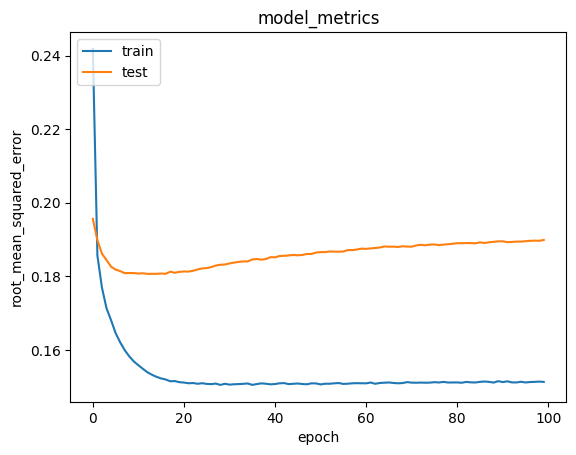

In [38]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Mendapatkan Rekomendasi

In [52]:
# Data
df = ratings.copy()

# Step 1: Encode user & book
user_ids = df['User-ID'].unique().tolist()
book_ids = df['ISBN'].unique().tolist()

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
book_encoded_to_book = {i: x for x, i in book_to_book_encoded.items()}

df['user'] = df['User-ID'].map(user_to_user_encoded)
df['book'] = df['ISBN'].map(book_to_book_encoded)
df['rating'] = df['Book-Rating']

# Step 2: Definisikan fungsi rekomendasi
def recommend_books_for_user(user_id, ratings, model, user_to_user_encoded, book_to_book_encoded, book_encoded_to_book, top_n=10):
    books_read_by_user = ratings[ratings['User-ID'] == user_id]
    books_not_read = ratings[~ratings['ISBN'].isin(books_read_by_user['ISBN'].values)]['ISBN'].unique()
    books_not_read = list(set(books_not_read).intersection(set(book_to_book_encoded.keys())))

    books_not_read_encoded = [[book_to_book_encoded.get(x)] for x in books_not_read]
    user_encoder = user_to_user_encoded.get(user_id)
    user_book_array = np.hstack(([[user_encoder]] * len(books_not_read_encoded), books_not_read_encoded))

    ratings_pred = model.predict(user_book_array).flatten()
    top_ratings_indices = ratings_pred.argsort()[-top_n:][::-1]
    recommended_book_ids = [book_encoded_to_book.get(books_not_read_encoded[x][0]) for x in top_ratings_indices]

    print(f"Showing recommendations for user: {user_id}")
    print("=" * 40)
    print("Books with high ratings from user")
    print("-" * 40)

    top_books_user = (
        books_read_by_user
        .sort_values(by='Book-Rating', ascending=False)
        .head(5)
        .ISBN.values
    )

    books_df_rows = ratings[ratings['ISBN'].isin(top_books_user)].drop_duplicates(subset='ISBN')
    for row in books_df_rows.itertuples():
        print(f"{row._4} - {row._5}")  # Book-Title - Book-Author

    print("-" * 40)
    print("Top 10 Book Recommendations")
    print("-" * 40)

    recommended_books = ratings[ratings['ISBN'].isin(recommended_book_ids)].drop_duplicates(subset='ISBN')
    for row in recommended_books.itertuples():
        print(f"{row._4} - {row._5}")  # Book-Title - Book-Author

# Step 3: Ambil sample user dan panggil fungsi
sample_user_id = df['User-ID'].sample(1).iloc[0]

recommend_books_for_user(
    user_id=sample_user_id,
    ratings=df,
    model=model,
    user_to_user_encoded=user_to_user_encoded,
    book_to_book_encoded=book_to_book_encoded,
    book_encoded_to_book=book_encoded_to_book,
    top_n=10
)


338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Showing recommendations for user: 139467
Books with high ratings from user
----------------------------------------
Charming Billy - Alice McDermott
The Professor and the Madman: A Tale of Murder, Insanity, and the Making of The Oxford English Dictionary - Simon Winchester
Staggerford (Mysteries &amp; Horror) - Jon Hassler
A Widow for One Year : A Novel - JOHN IRVING
The Trumpet of the Swan - E. B. White
----------------------------------------
Top 10 Book Recommendations
----------------------------------------
Postmarked Yesteryear: 30 Rare Holiday Postcards - Pamela E. Apkarian-Russell
Uncle John's Supremely Satisfying Bathroom Reader (Uncle John's Bathroom Reader) - Bathroom Readers Institute
The Hobbit - J. R. R. Tolkien
Betsy and Tacy Go Downtown (Betsy-Tacy) - Maud Hart Lovelace
Our Bodies Ourselves For The New Century (A Touchstone book) - Boston Women's Health Book Collective
Goodnight Moon Board Book - Margaret Wise Brown
Dreams of Chi

**📌 Identitas Pengguna**

User ID: 139467

**✅ Preferensi Genre atau Pola Rating User**

Buku yang disukai user (dengan rating tinggi):
- Charming Billy - Alice McDermott
- The Professor and the Madman - Simon Winchester
- Staggerford - Jon Hassler
- A Widow for One Year - John Irving
- The Trumpet of the Swan - E. B. White

**📍Insight:**

User menyukai fiksi sastra, novel klasik, dan biografi/cerita historis.

**🔮 Rekomendasi 10 Buku Teratas:**

1. Postmarked Yesteryear - Pamela E. Apkarian-Russell
2. Uncle John's Supremely Satisfying Bathroom Reader
3. The Hobbit - J. R. R. Tolkien
4. Betsy and Tacy Go Downtown - Maud Hart Lovelace
5. Our Bodies Ourselves For The New Century
6. Goodnight Moon Board Book - Margaret Wise Brown
7. Dreams of Childhood
8. Dilbert: A Book of Postcards
9. Natural California
10. Postcards from Live and Learn and Pass It On

**📌 Sistem menyarankan:**

- Campuran buku klasik, fantasi, humor, dan nonfiksi populer.
- Ada kesinambungan dengan preferensi sebelumnya, terutama pada nuansa nostalgia dan cerita personal.

**🧠 Kesimpulan Akhir**

*Sistem berhasil mengenali preferensi literatur klasik dan menambah variasi genre seperti humor dan fantasi ringan untuk eksplorasi lebih lanjut.*